# Read data

In [1]:
## 1.Read log10(x+1) transformed scReference 

scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2020_1_19_scReferenceV4.log10.CV.rds")
scReference.list.log10 <- scReference.log10.CV$scReference.list.log10
scReference.list.log10.CV1000 <- scReference.log10.CV$scReference.list.log10.CV1000
scReference.list.log10.CV1500 <- scReference.log10.CV$scReference.list.log10.CV1500
scReference.list.log10.CV2000 <- scReference.log10.CV$scReference.list.log10.CV2000
scReference.list.log10.CV4000 <- scReference.log10.CV$scReference.list.log10.CV4000
scReference.list.log10.CV8000 <- scReference.log10.CV$scReference.list.log10.CV8000


#### 2.Read scRNA colon cancer
### 1).Tang colon cancer
Tang_scColon_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/Tang_scColon_cancer_dataset/Tang_scColon_dataset.rds")
Tang.colon.cancer.FPKM.500 <- Tang_scColon_dataset$FPKM.500.exp
Tang.colon.cancer.TPM.688 <- Tang_scColon_dataset$TPM.688.exp
Tang.colon.cancer.FPKM.500.pheno <- Tang_scColon_dataset$FPKM.500.pheno
Tang.colon.cancer.TPM.688.pheno <- Tang_scColon_dataset$TPM.688.pheno
### 2).RCA colon cancer
RCA_epithelial_COUNT_normal_uniGene_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/GSE81861_RCA_colorectal_tumors/RCA_epithelial_COUNT_normal_uniGene_dataset.rds")
NM.epithelial.COUNT.normal.uniGene <- RCA_epithelial_COUNT_normal_uniGene_dataset$NM.epithelial.COUNT.normal.uniGene
Tumor.epithelial.COUNT.normal.uniGene <- RCA_epithelial_COUNT_normal_uniGene_dataset$Tumor.epithelial.COUNT.normal.uniGene
NM.Epi.phenoType <- RCA_epithelial_COUNT_normal_uniGene_dataset$NM.Epi.phenoType
Tumor.Epi.phenoType <- RCA_epithelial_COUNT_normal_uniGene_dataset$tumor.Epi.phenoType

In [2]:
#### 3.Data transformation 
#### Data transformation ####
#### log10 (x + 1)
log10.Tang.colon.cancer.FPKM.500 <- log10(Tang.colon.cancer.FPKM.500 + 1)
log10.Tang.colon.cancer.TPM.688 <- log10(Tang.colon.cancer.TPM.688 + 1)
log10.NM.epithelial.COUNT.normal.uniGene <- log10(NM.epithelial.COUNT.normal.uniGene + 1)
log10.Tumor.epithelial.COUNT.normal.uniGene <- log10(Tumor.epithelial.COUNT.normal.uniGene + 1)
## build a list
Log10.expList <- list(log10.Tang.colon.cancer.FPKM.500 = log10.Tang.colon.cancer.FPKM.500,
                     log10.Tang.colon.cancer.TPM.688 = log10.Tang.colon.cancer.TPM.688,
                     log10.NM.epithelial.COUNT.normal.uniGene = log10.NM.epithelial.COUNT.normal.uniGene,
                     log10.Tumor.epithelial.COUNT.normal.uniGene = log10.Tumor.epithelial.COUNT.normal.uniGene)


In [3]:
1+1

[1] 2

In [ ]:
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
Cor.Res.CV1000 <- refCorMerge(Log10.expList, scReference.list.log10.CV1000)

#### I can not dot this step in note book so , I read resault from Rstudio 

In [ ]:
##################################################
##### 4.Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
Cor.Res.CV1000 <- refCorMerge(Log10.expList, scReference.list.log10.CV1000)
Cor.Res.CV1500 <- refCorMerge(Log10.expList, scReference.list.log10.CV1500)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, scReference.list.log10.CV2000)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, scReference.list.log10.CV4000)
Cor.Res.CV8000 <- refCorMerge(Log10.expList, scReference.list.log10.CV8000)

In [9]:
#### Read Cor.Res from Rstudio
Pheno.merged <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_scColon_V2/scColon_Pheno.merged.rds")
Cor.Res.list <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_scColon_V2/scColon_log10_screferenceV4_Cor.Res.list.rds")
Cor.Res <- Cor.Res.list$Cor.Res
Cor.Res.CV1000 <- Cor.Res.list$Cor.Res.CV1000
Cor.Res.CV1500 <- Cor.Res.list$Cor.Res.CV1500
Cor.Res.CV2000 <- Cor.Res.list$Cor.Res.CV2000
Cor.Res.CV4000 <- Cor.Res.list$Cor.Res.CV4000
Cor.Res.CV8000 <- Cor.Res.list$Cor.Res.CV8000



In [11]:
#### Raw Correlation value transformed into correlation percent for each cell
########## Convert cor value to rang From 1 to 0 max was 1 min was 0
Trans.Rang1<- base::apply(Cor.Res$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.1000<- base::apply(Cor.Res.CV1000$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.1500<- base::apply(Cor.Res.CV1500$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.2000<- base::apply(Cor.Res.CV2000$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.4000<- base::apply(Cor.Res.CV4000$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.8000<- base::apply(Cor.Res.CV8000$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


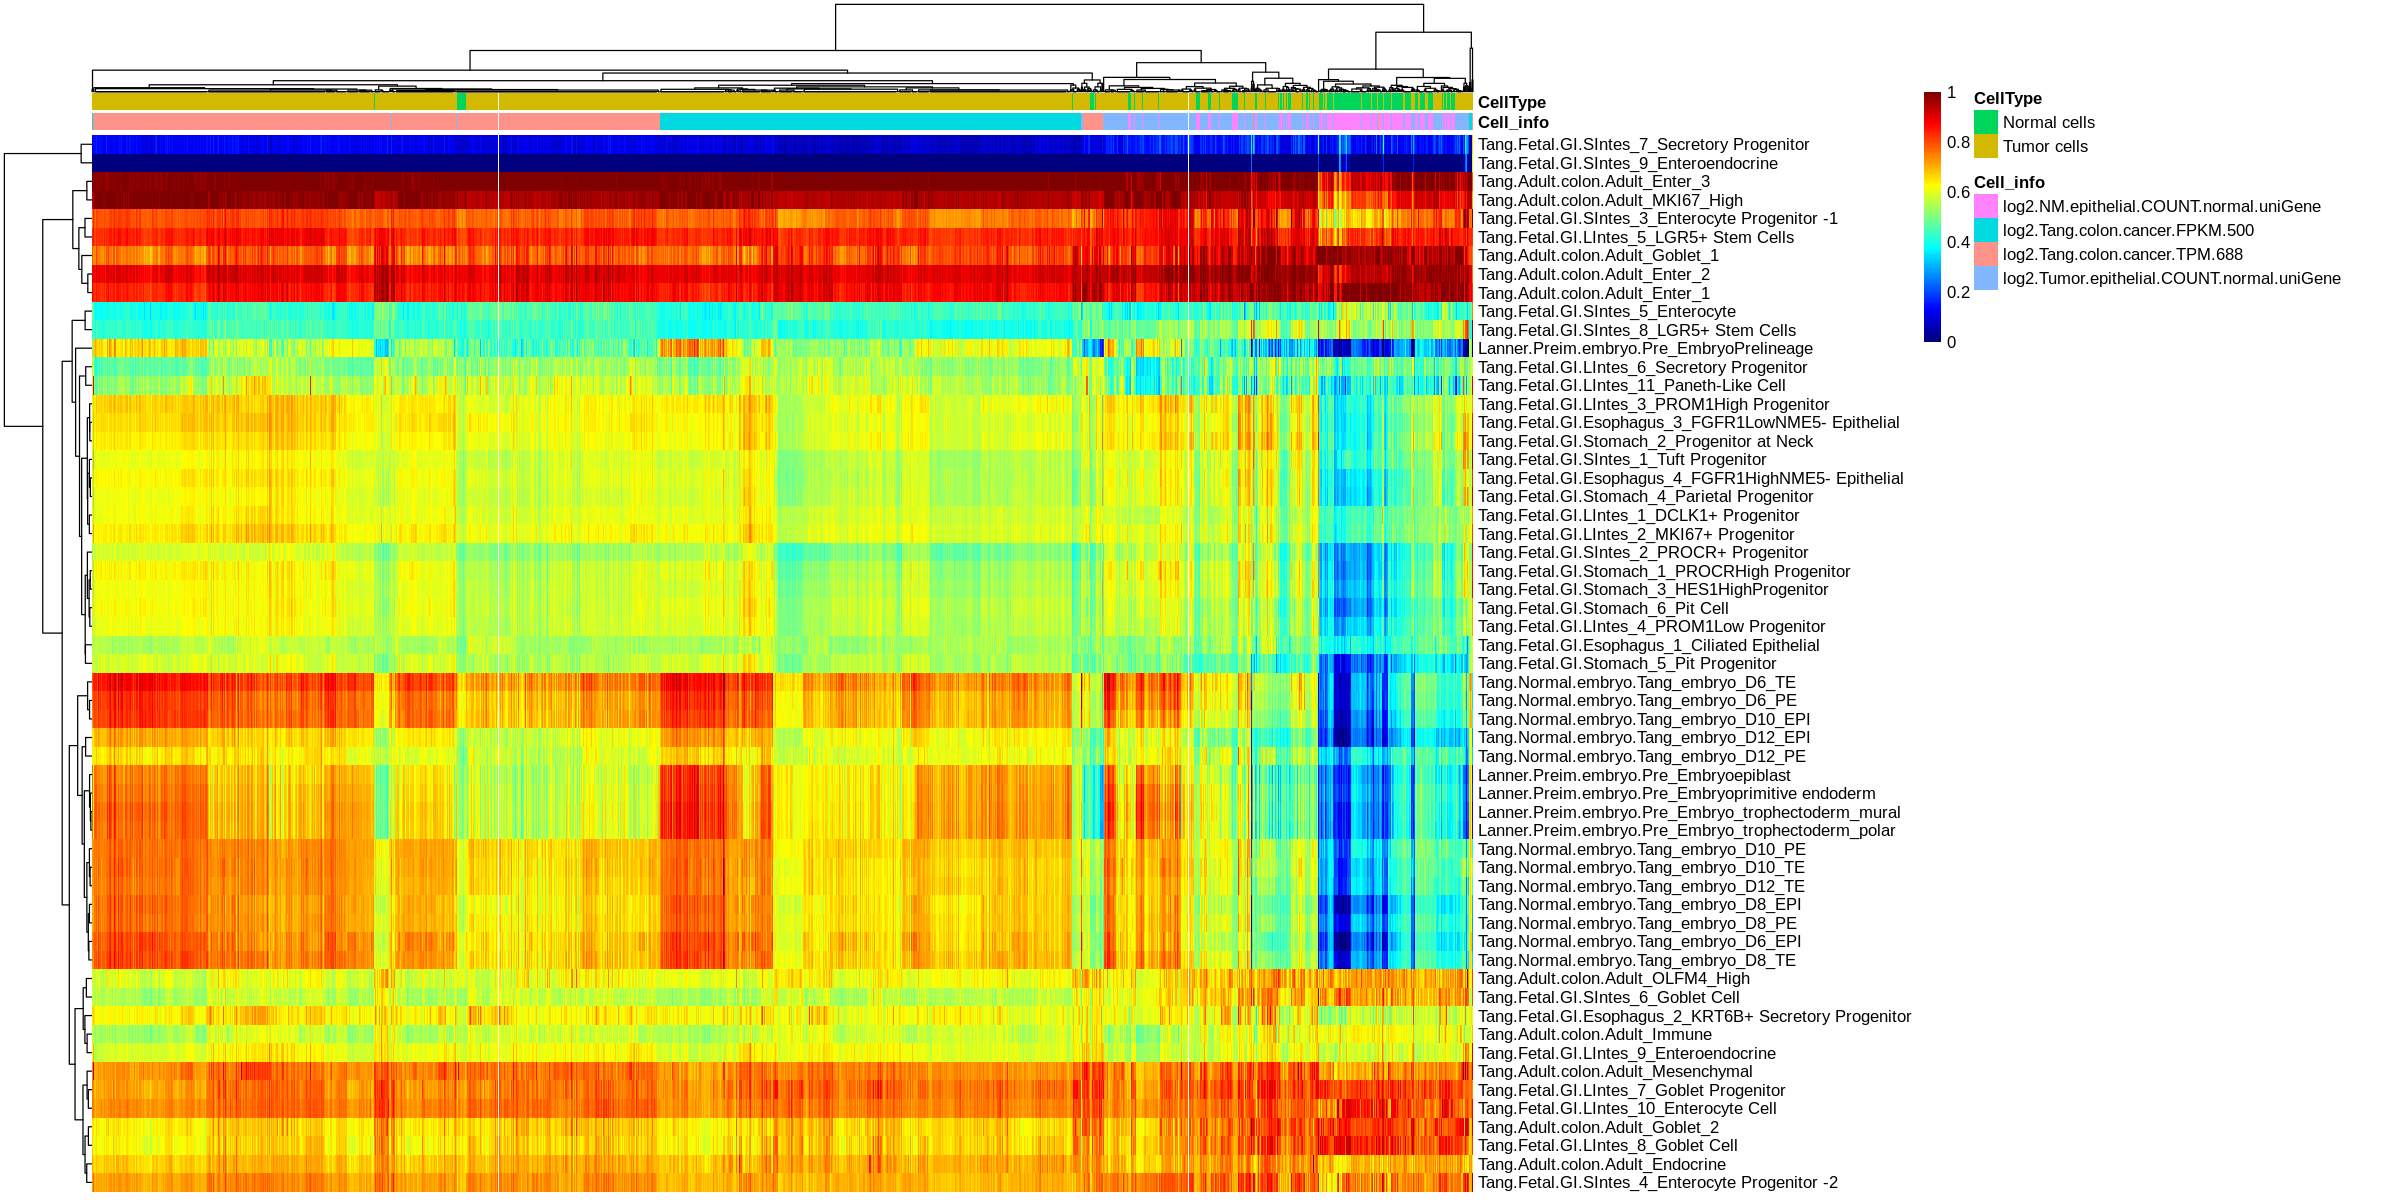

In [12]:
## all genes 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1
Pheno.merged.tumor <- Pheno.merged
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


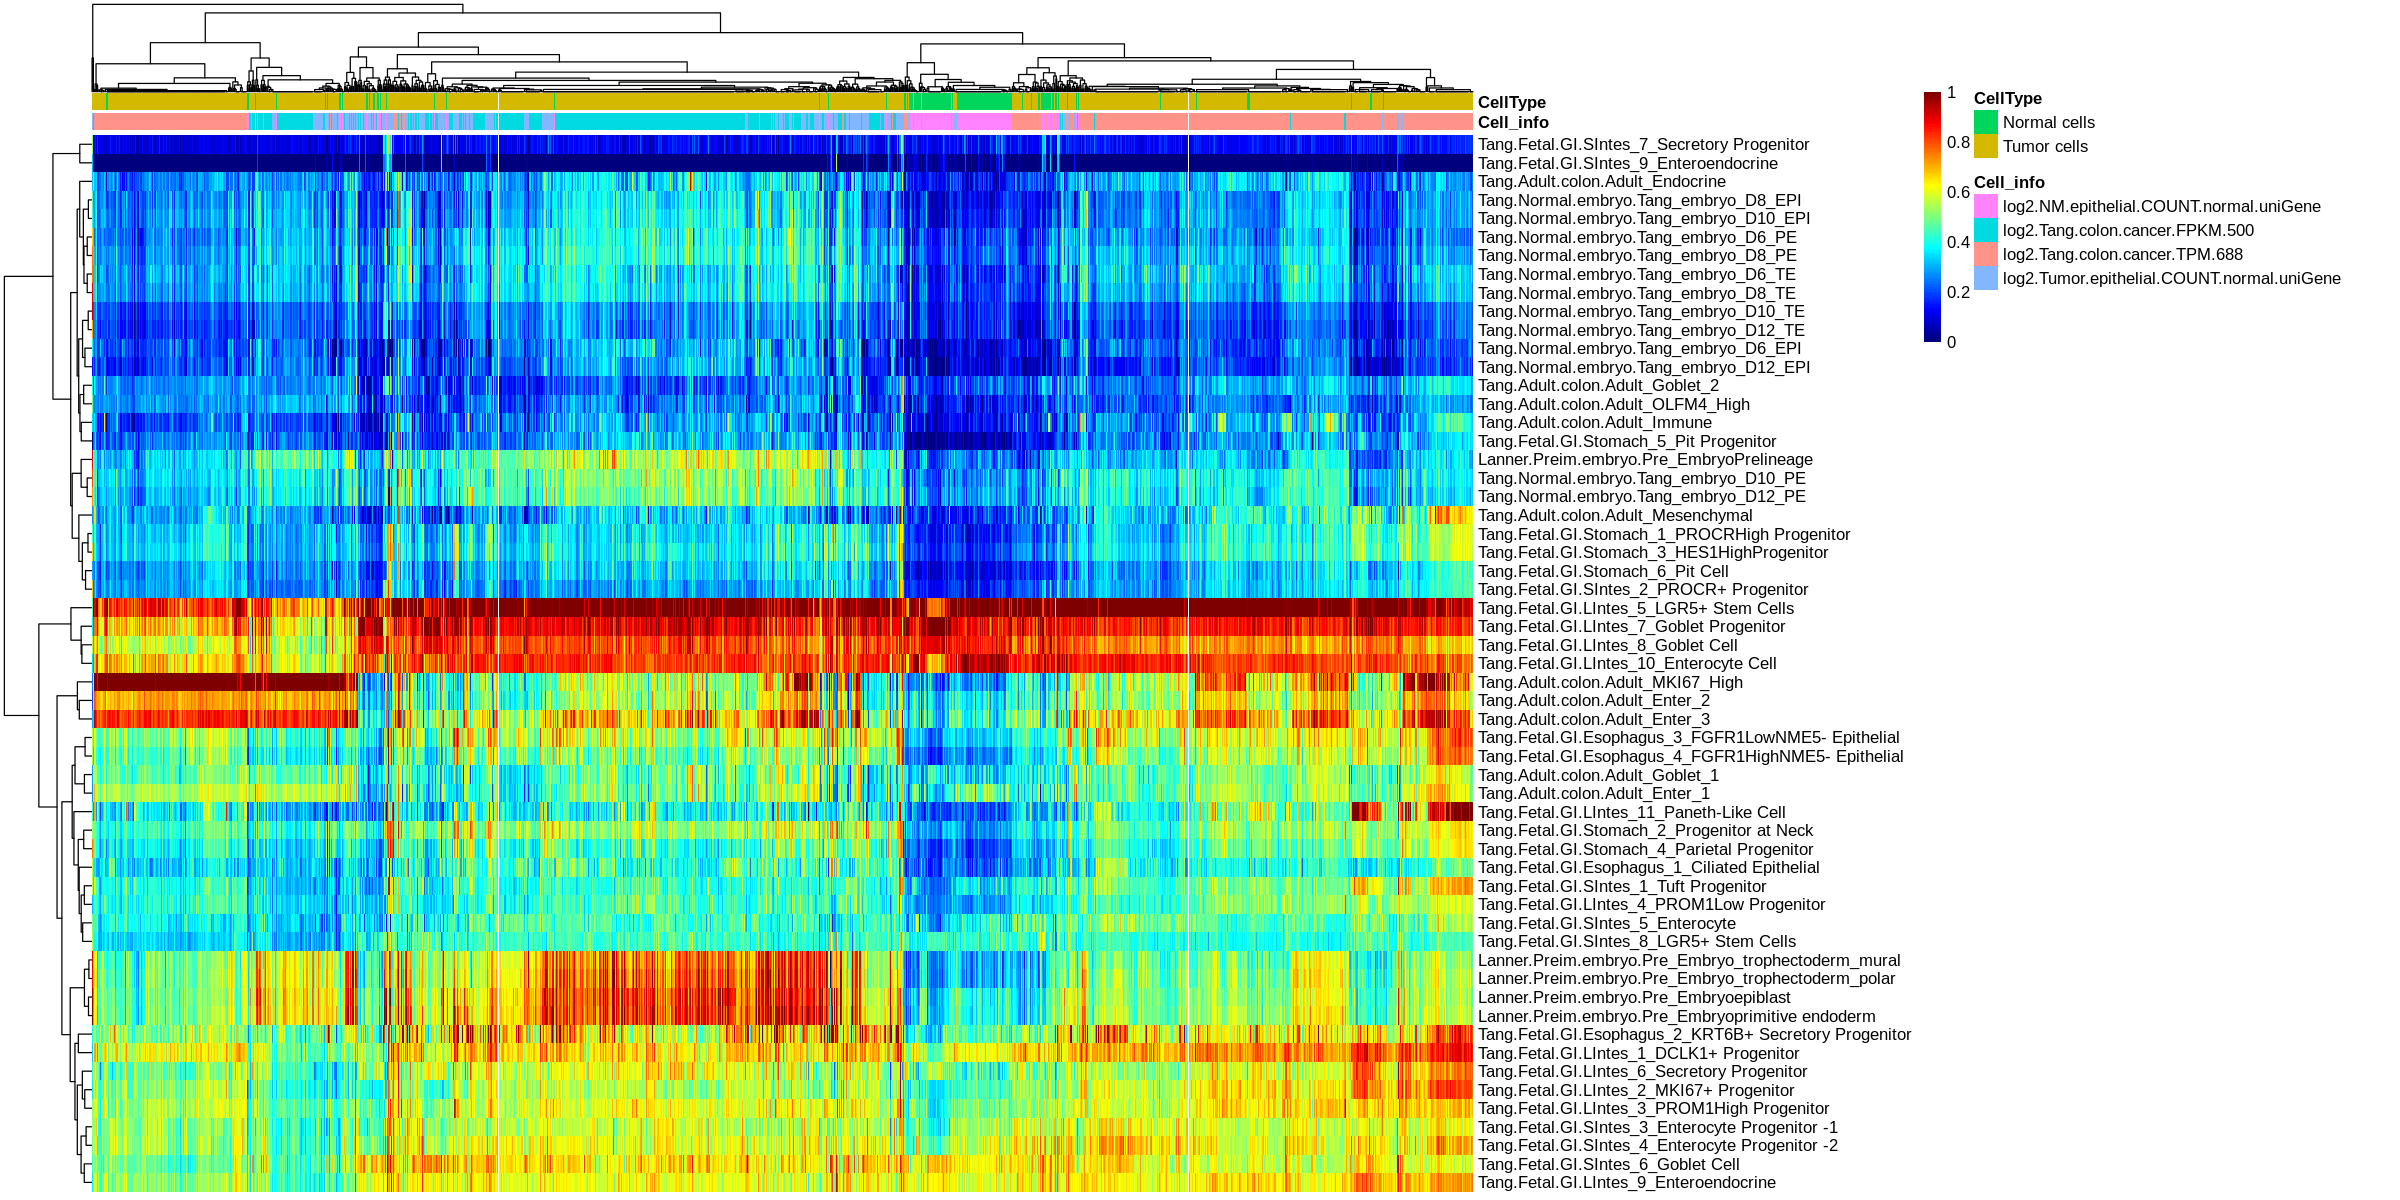

In [13]:
## cv8000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1.8000
Pheno.merged.tumor <- Pheno.merged
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


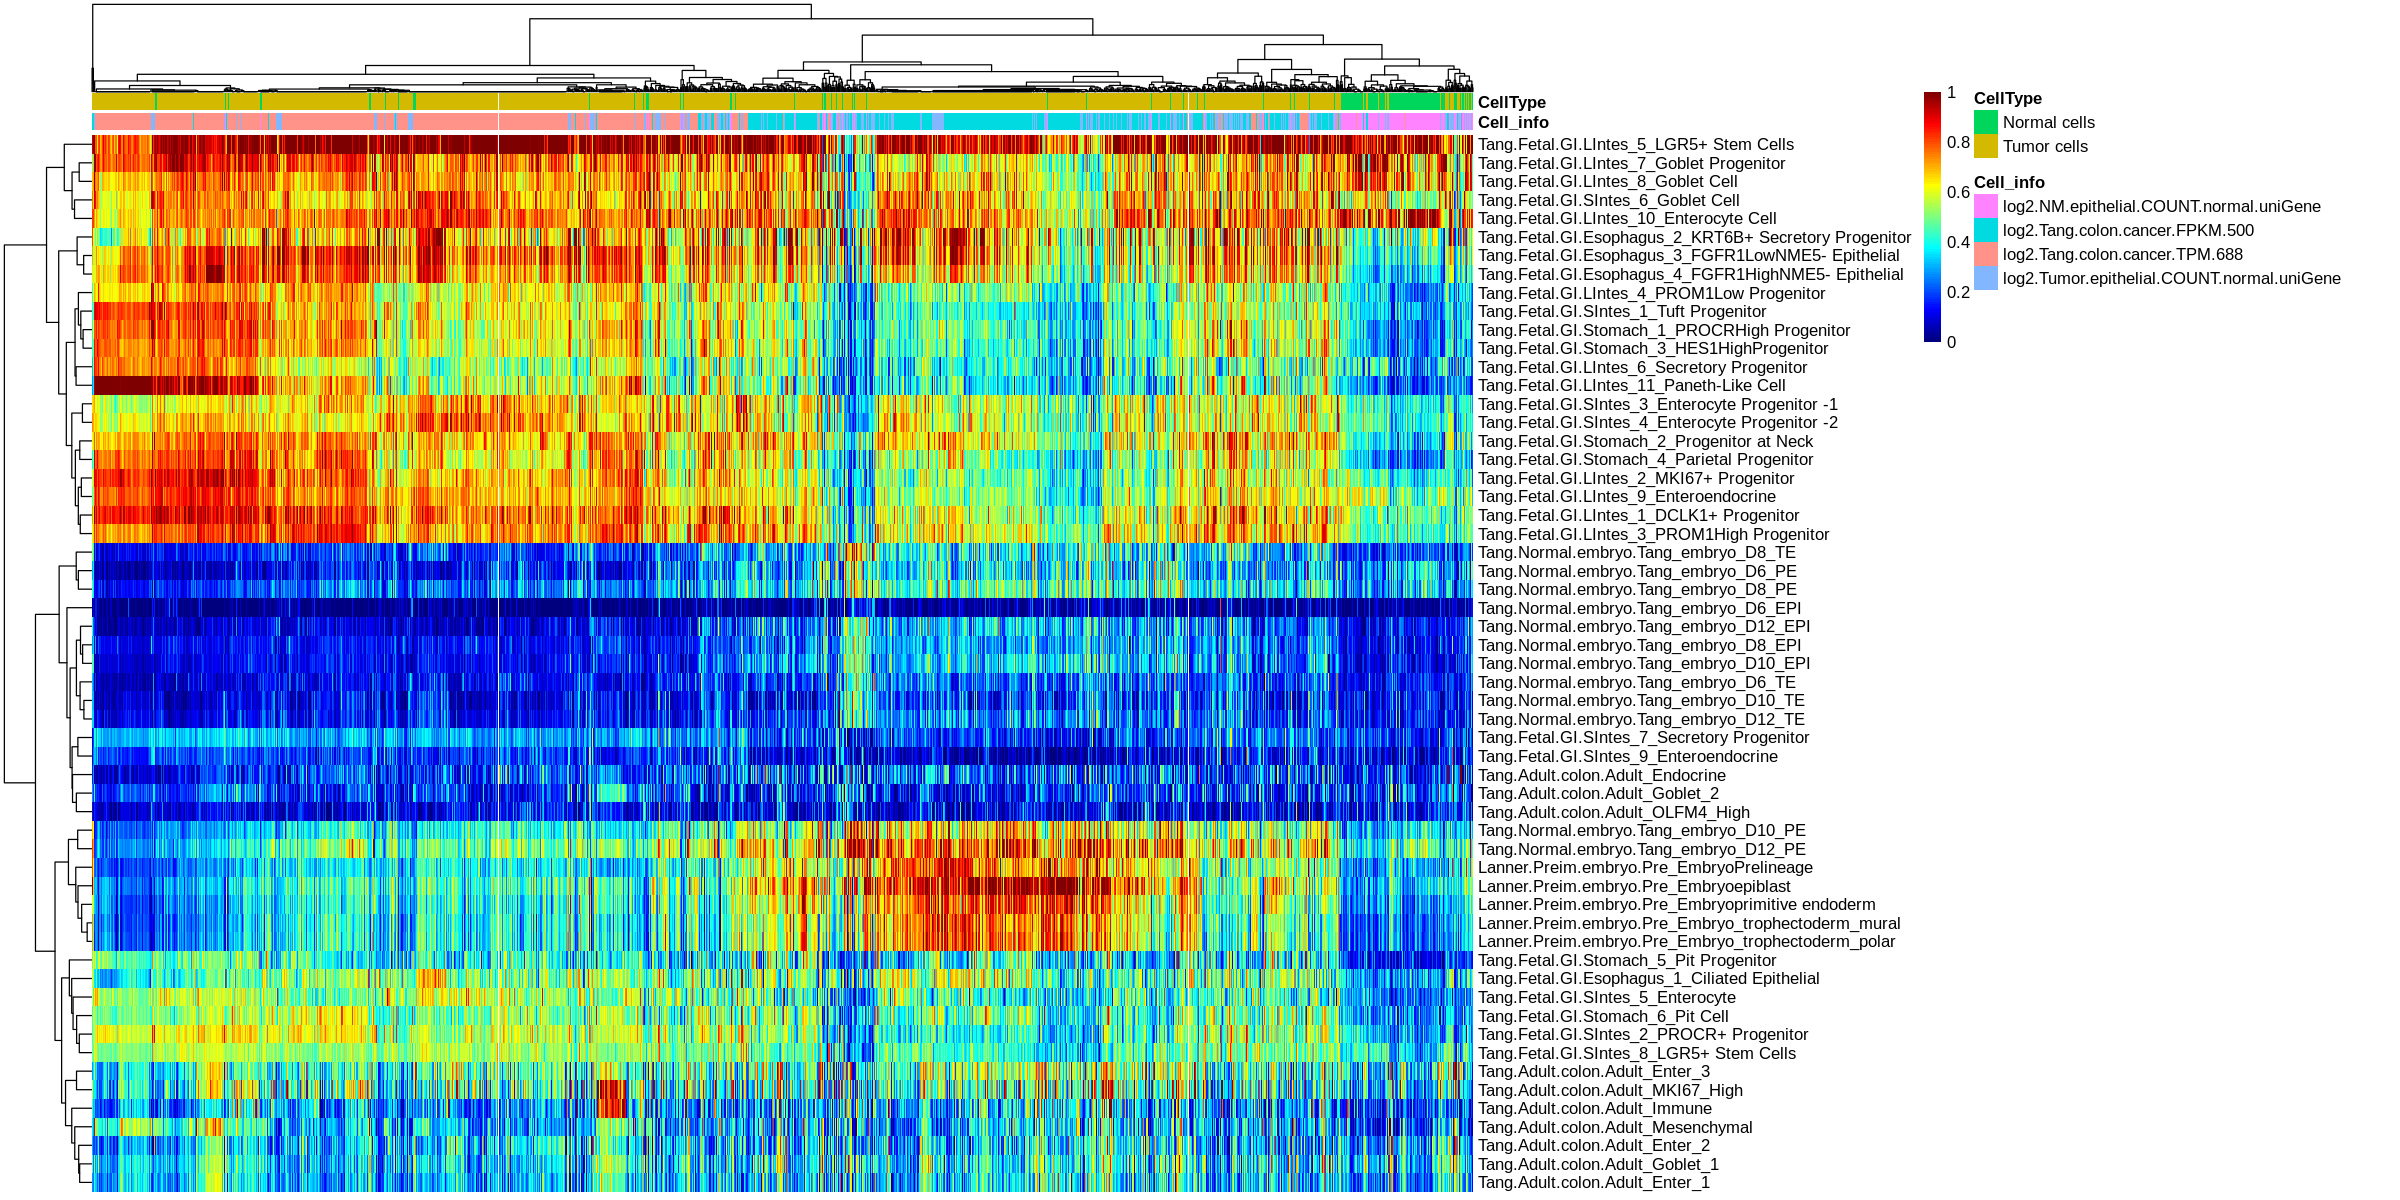

In [14]:
## cv4000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1.4000
Pheno.merged.tumor <- Pheno.merged
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


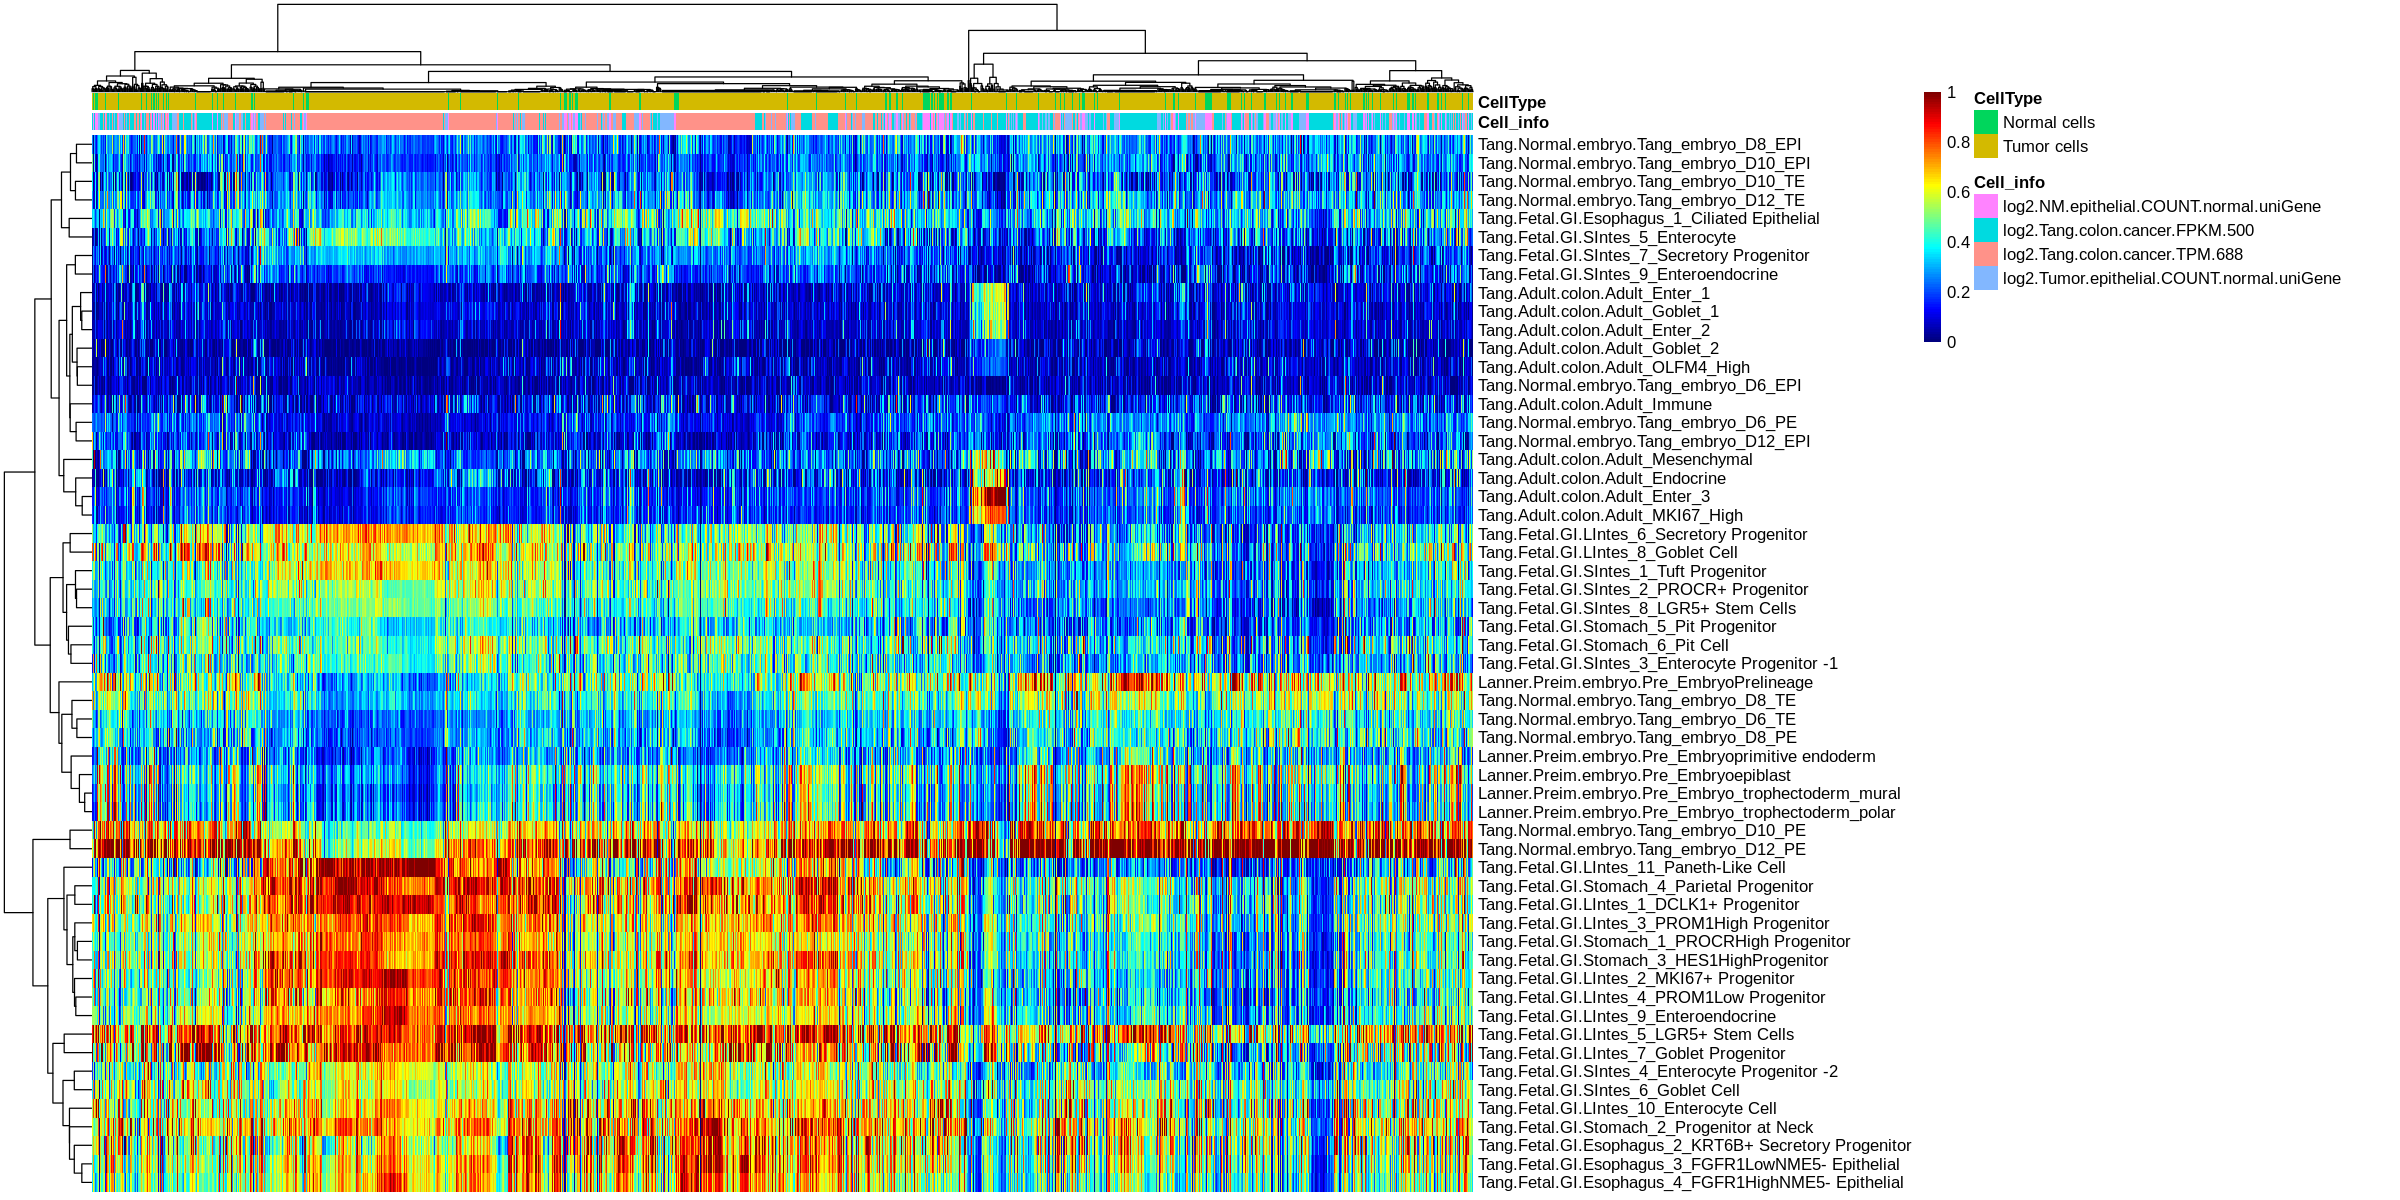

In [15]:
## cv2000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1.2000
Pheno.merged.tumor <- Pheno.merged
Cor.tumor[is.na(Cor.tumor)] <- 0 #### convert NA to 0
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


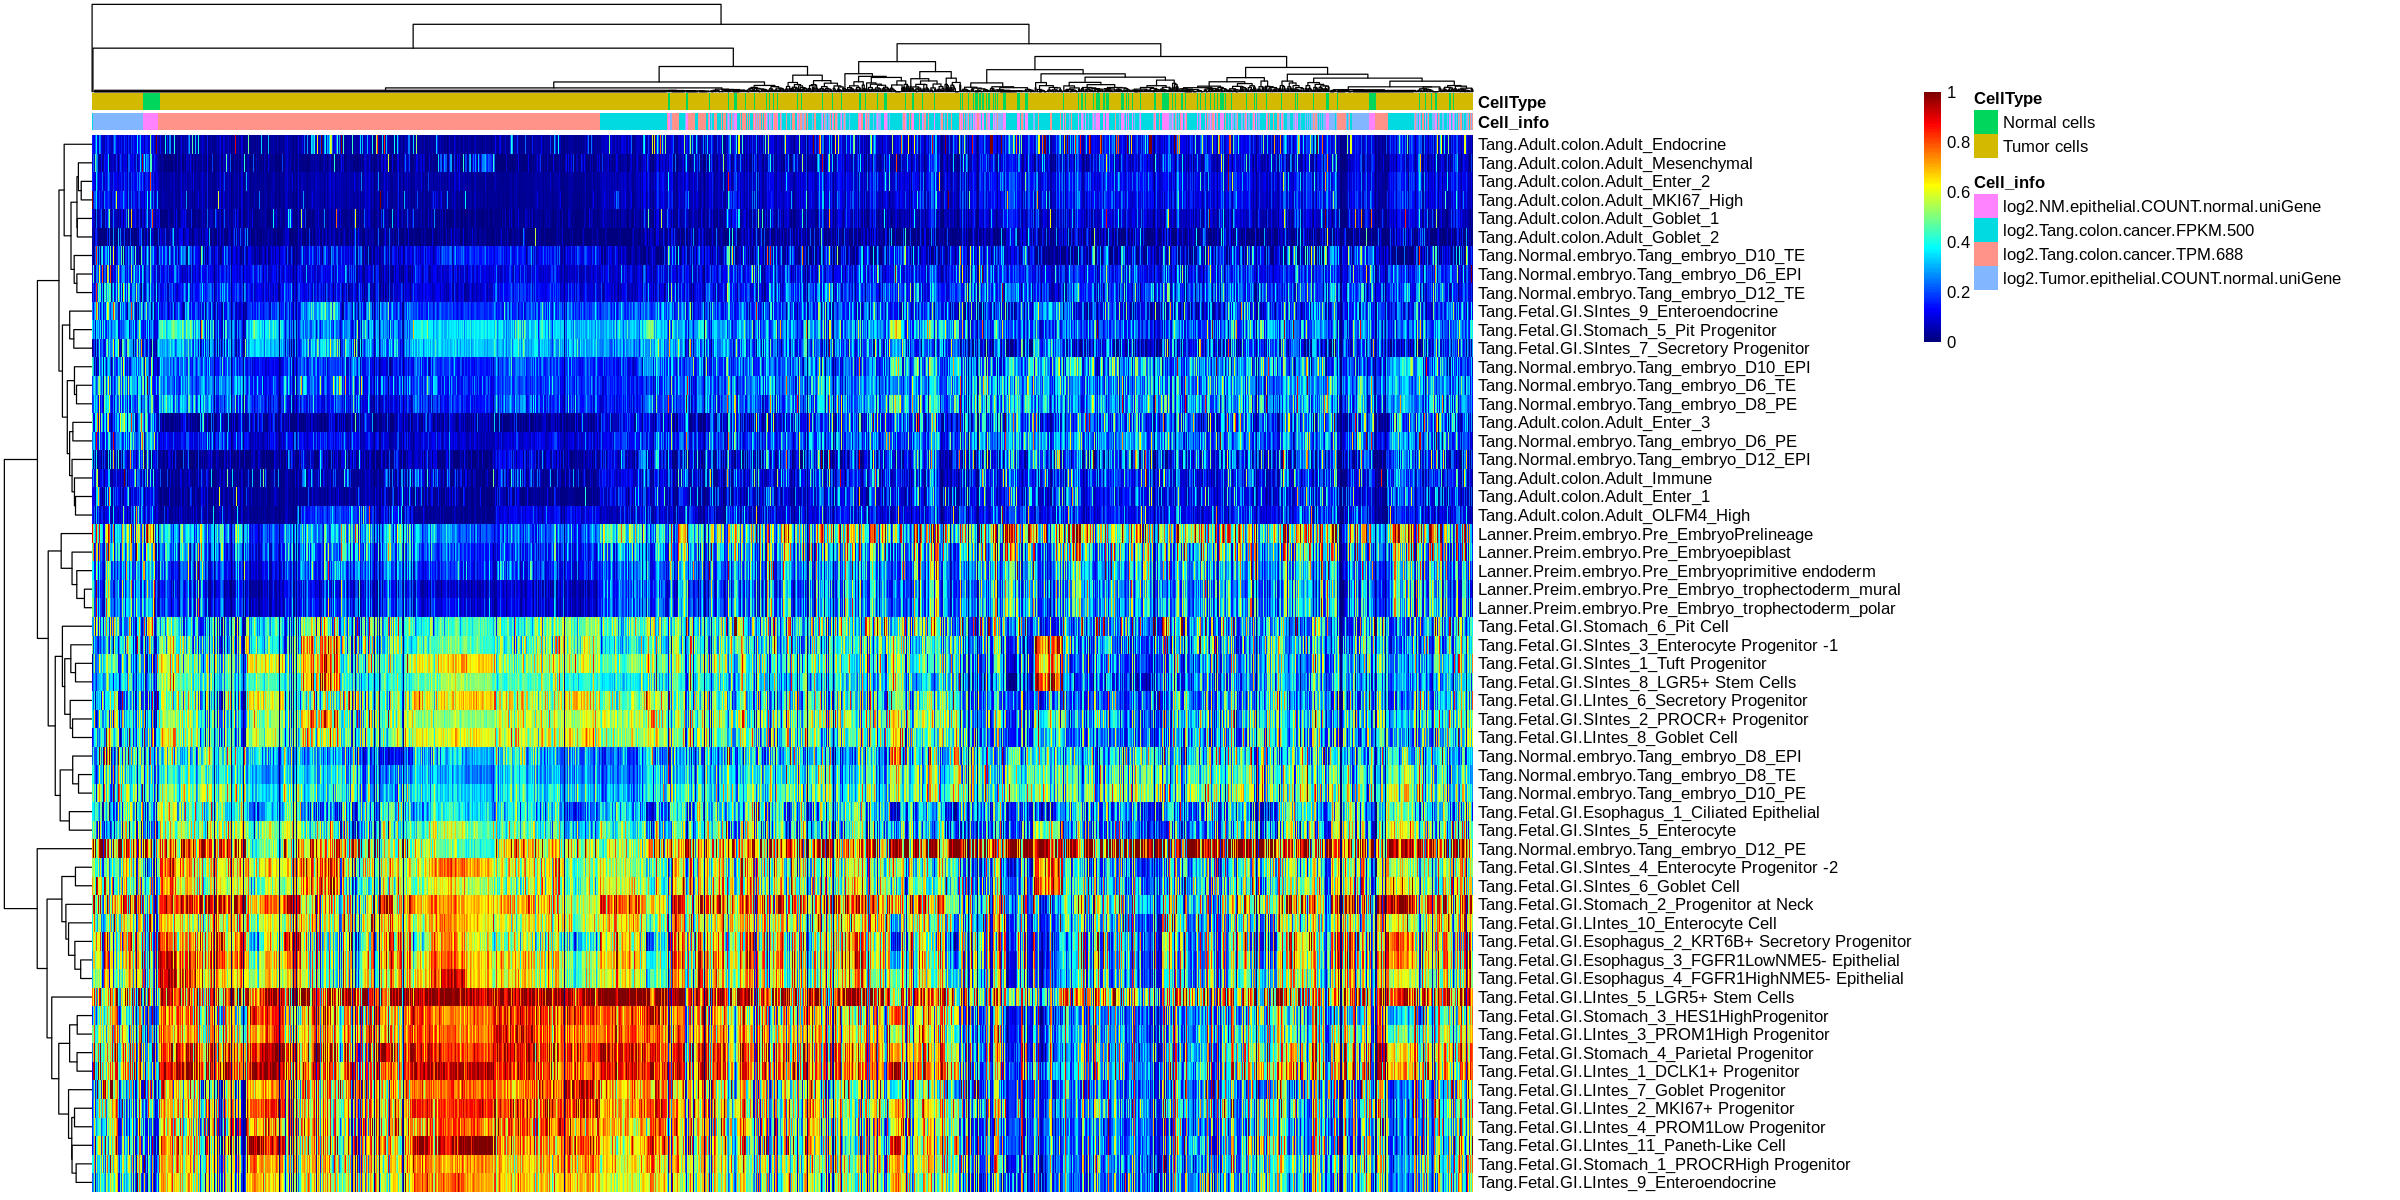

In [16]:
## cv1500 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1.1500
Pheno.merged.tumor <- Pheno.merged
Cor.tumor[is.na(Cor.tumor)] <- 0 #### convert NA to 0
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


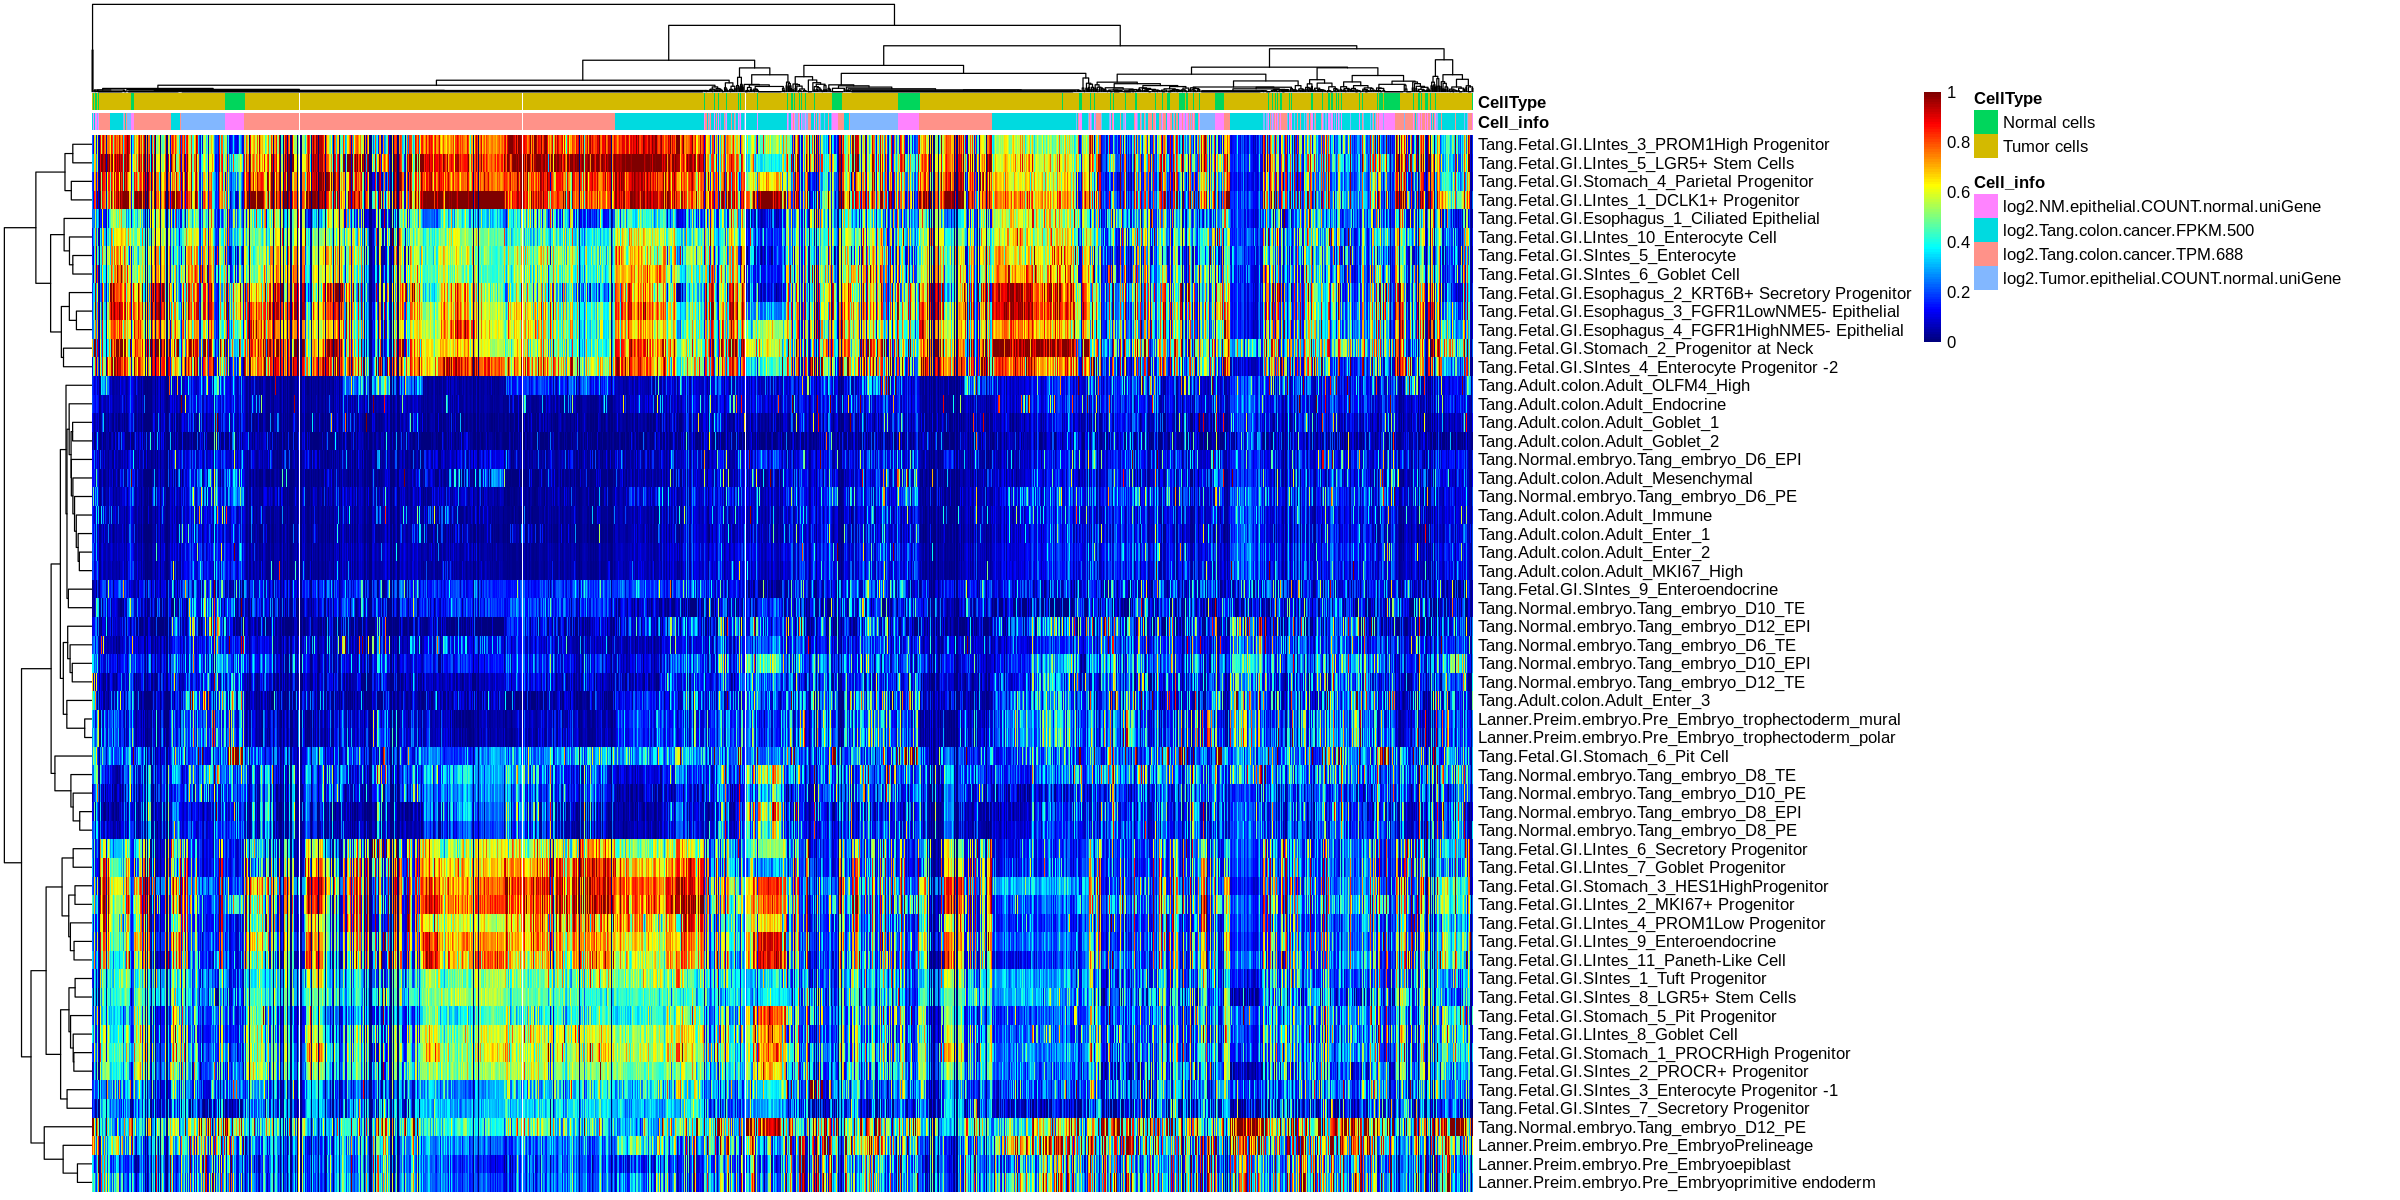

In [17]:
## cv1000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Trans.Rang1.1000
Cor.tumor[is.na(Cor.tumor)] <- 0 #### convert NA to 0
Pheno.merged.tumor <- Pheno.merged
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged[,c("Cell_info","CellType")], cluster_cols = hcTumor)